# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset used in this project, **TMDb-Movies**, provides us with information about movies produced from 1960 to 2015. The goal here will be to define the characteristics present in movies with high revenues and which genres perform better. You may find in the dataset the year of release, adjusted revenue and budget, their length and their ratings, as well as other attributes. 

In [1]:
# import the packages to be used in the analysis process
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style('darkgrid')

### Questions 
> Considering the goal of this project, I posed the following questions:
> * How do movies with high revenues compare with the ones with low revenue?
> * Which genres present higher ratings?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load the data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> With the data loaded and these few rows printed above, I can decide which attributes will be useful to answer the questions posed. In order to better make this decision, it is also important to check how much of the data is missing in each column.  

In [3]:
# Find which columns contains missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>At first glance, it shows up the huge amount of missing data in the column `'homepage'`. Looking more carefully, you may find that the following columns also present rows without values: `'imdb_id'`, `'cast'`, `'director'`, `'tagline'`, `'keywords'`, `'overview'`, `'genres'` and `'production_companies'`. Considering the aims of my project, it will be insteresting to drop most of them.  

In [4]:
# Describe the information of columns with numerical data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>After checking out for null values, I am running the `describe()` function to situate any possible strange behaviors in the dataset. Here, some columns present values that are well above or below the mean. For instance, in the column `'runtime'`, there is a movie with a duration of 0 minutes and another with 900 minutes (15 hours). The columns `'budget'` and `'revenue'`, as well as their adjusted versions, register values stating that nothing was spent or earned with some movies. 
>
>These rows with zero values comprise at least 50% of this dataset. This have a huge impact in terms of mean and percentile distribution. Besides, given the variety of movies within these rows it may not be effective to fill in these rows with mean values. Taking into account the importance of revenue values in my analysis, I may have to drop the rows with no revenue. 

### Dropping columns

>Because, the intention here is not to identify every movie by its title or by whom made part of it, and neither which company produced them, I decided to drop the following columns: `'id'`, `'imdb_id'`, `'original_title'`, `'cast'`, `'director'` and `'production_companies'`.
>
>Besides, I do not consider useful to include in the analysis the `'homepage'`, `'tagline'`, `'keywords'` and `'overview'` columns for the text information they bring will not help me draw any conclusions related to the questions I made. When it comes to rating the movies I preferred to keep the `'vote_average'` column and to drop the one called `'popularity'`.
>
>Instead of using `'budget'` and `'revenue'` columns, I decided to use for my computations the `'budget_adj'` and `'revenue_adj'` because their values adjusted to 2010 dollars make possible to compare movies over the years. 
>
>Finally, it will be more interesting to take the `'release_year'` column than that of `'release_date'`. My analysis over time does not need to be very specific about the date of release. 

In [5]:
# Drop the columns specified above
drop_columns = ['id', 'imdb_id', 'cast', 'original_title', 'director', 'popularity',
                'production_companies', 'homepage', 'tagline', 'keywords',
                'overview', 'budget', 'revenue', 'release_date']

df.drop(drop_columns, axis=1, inplace=True)
df.head()

,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


### Dropping rows and duplicated values

>As stated above, the rows with zeroes may produce a considerable impact in this analysis as almost half of the rows are filled in with zero values. In order to have a more accurate analysis, I am dropping these rows.  

In [6]:
# Drop rows with zero values in the revenue column
revenues_0 = df[df['revenue_adj'] == 0].index
df.drop(revenues_0, inplace=True)

>After dropping the rows with zeroes in the `'revenue_adj'` column, all the columns now have the same amount of non-null rows. Following this, I am checking here if there are any duplicated rows. 

In [7]:
# Find duplicated values
df.loc[df.duplicated()]

,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [8]:
# Drop the duplicated movie found 
df.drop_duplicates(inplace=True)

>As a result of this `df.loc[df.duplicated()]`, I could find the only movie with repeated values. I am dropping this row to reduce any noise in the computations to follow.  

In [9]:
# Select and drop movies with more than 250 minutes
longer_250 = df[df['runtime'] > 250].index
df.drop(longer_250, inplace=True)

>Some movies present lengths that are well above the average. Because there are just a few, I decided not to consider movies longer than 250 minutes (more than 4 hours) in this project.

<a id='propvote'></a>
### Creating a proportional vote rating column 

In [10]:
# Total amount of votes and the proportion of votes of each movie to the total
total_votes = df.vote_count.sum()
votes_proportions = df['vote_count']/total_votes

In [11]:
df['prop_vote'] = df.vote_average*votes_proportions

>Considering that certain movies received less than 30 votes and others more than 3000, I preferred to create a new column that would better translate the rating of each movie. In order to achieve this, I multiplied this proportion of votes to the values within the `'vote_average'` column.  

In [12]:
# After dropping rows and columns
df.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,prop_vote
count,4846.000000,4846.000000,4846.000000,4846.000000,4.846000e+03,4.846000e+03,4846.000000
mean,107.767231,436.471936,6.148556,2000.919521,3.518013e+07,1.151324e+08,0.001376
std,18.897996,806.693350,0.798503,11.571937,4.376819e+07,1.989066e+08,0.002750
min,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00,0.000011
25%,95.000000,46.250000,5.600000,1994.000000,2.340083e+06,1.046758e+07,0.000133
50%,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.396405e+07,0.000419
75%,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08,0.001295
max,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,0.036479


In [13]:
# General info after dropping rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   runtime       4846 non-null   int64  
 1   genres        4846 non-null   object 
 2   vote_count    4846 non-null   int64  
 3   vote_average  4846 non-null   float64
 4   release_year  4846 non-null   int64  
 5   budget_adj    4846 non-null   float64
 6   revenue_adj   4846 non-null   float64
 7   prop_vote     4846 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 340.7+ KB


>These are the general properties after dropping rows, columns and duplicates. Until here, I have enough support to answer the first question. For the second one, I will have to split the `'genres'` column in order to analyse the characteristics of each genre.  

### Separating the genres of each movie

In [14]:
# Reorganize the values present in genres column turning them into lists
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df.head(1)

,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,prop_vote
0,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09,0.017092


In [15]:
# Explode genres column in order to assess and analyse the genres of each movie separately. 
df_genres_sep = df.explode('genres')
df_genres_sep.head()

,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,prop_vote
0,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,0.017092
0,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09,0.017092
0,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09,0.017092
0,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,0.017092
1,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,0.020761


>I decided to base my exploratory analysis of the question about genres in a separate dataframe, because the process of splitting the column have altered other general properties, for instance, the revenue. In addition, I am not taking the genres into account when answering the first question about high revenues.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. How do movies with high revenues compare with the ones with low revenue?

In [16]:
# Divide movies into high and low revenues
revenue_mean = df.revenue_adj.mean()
high_revenue = df[df['revenue_adj'] >= revenue_mean]
low_revenue = df[df['revenue_adj'] < revenue_mean]

<a id='amount'></a>
>Firstly, I defined what will be considered as High revenue. Taking the mean as reference, I divided movies into two categories, high and low revenues. 

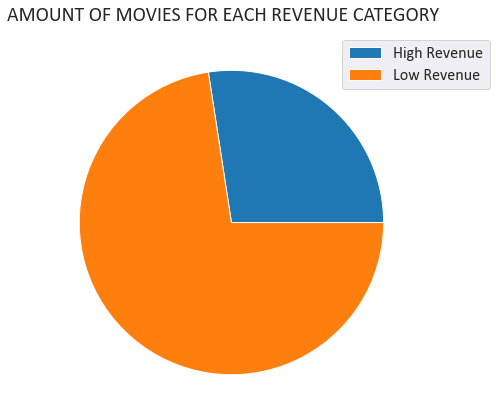

In [17]:
# Check the amount of entries for each category of movie
high_movies = high_revenue['release_year'].count()
low_movies = low_revenue['release_year'].count()
pie_movies = high_movies, low_movies

# Change the font of axes labels
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Calibri']

# pie plot of total amount of movies in each category of revenue
plt.figure(figsize=(9, 7))
plt.pie(pie_movies)
plt.suptitle('AMOUNT OF MOVIES FOR EACH REVENUE CATEGORY', y=.93, fontsize=20, fontfamily='Calibri')
plt.legend(['High Revenue', 'Low Revenue'], loc='upper right',  bbox_to_anchor=(1.2, 0.5, 0, 0.5));

>Secondly, I checked the amount of movies in each category in the dataset. After this division, it is noticeable that movies considered with low revenues account for more than half of the entries of the total.

<a id='prop_high'></a>
### Year of Release

>Here, I am analysing the high-revenue movies by the year of release. 

In [18]:
# total amount of movies released per year
total_mov_year = df.groupby('release_year')['release_year'].count()

# movies with high revenue released per year
high_mov_year = high_revenue.groupby('release_year')['release_year'].count()

# proportion of high-revenue movies in the total per year
high_mov_prop = high_mov_year/total_mov_year

>I decided to compare the amount of high-revenue movies with the total determining the proportion of those movies each year.

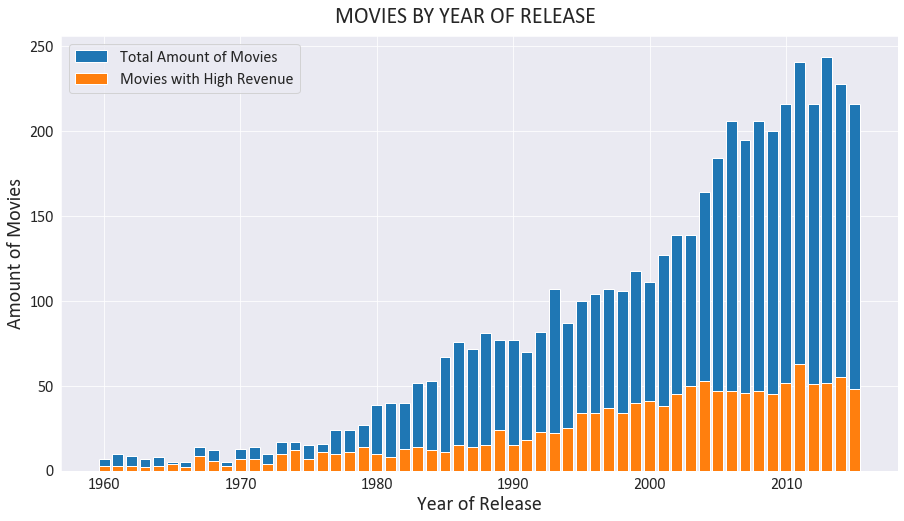

In [19]:
# plot 
plt.figure(figsize=(15, 8))
plt.bar(total_mov_year.index, total_mov_year, label= 'Total Amount of Movies')
plt.bar(high_mov_year.index, high_mov_year, label='Movies with High Revenue')
plt.suptitle('MOVIES BY YEAR OF RELEASE', y=.93, fontsize=22, fontfamily='Calibri')
plt.xlabel('Year of Release', fontsize=20, fontfamily='Calibri')
plt.ylabel('Amount of Movies', fontsize=20, fontfamily='Calibri')
plt.legend(prop={"size": 16});

>In the chart above, you may find the total amount of entries in this dataset, as well as the ones considered movies with high revenue per year. 

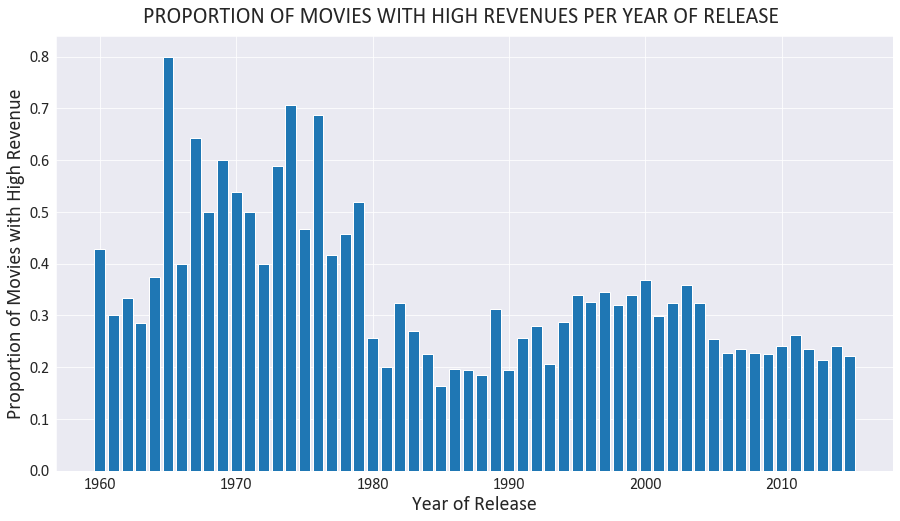

In [20]:
# plot of proportional amount of high-revenue movies by the total
plt.figure(figsize=(15, 8))
plt.bar(high_mov_prop.index, high_mov_prop)
plt.suptitle('PROPORTION OF MOVIES WITH HIGH REVENUES PER YEAR OF RELEASE', y=.93, fontsize=22, fontfamily='Calibri')
plt.xlabel('Year of Release', fontsize=20, fontfamily='Calibri')
plt.ylabel('Proportion of Movies with High Revenue', fontsize=20, fontfamily='Calibri');

>This other chart presents the proportion of movies with high revenue compared with the total amount released per year.
>The small amount of samples in the 1960s and the 1970s result the proportion of movies with high revenues to vary a lot in these decades, even reaching 80% of the movies relesased in 1965. Meanwhile, from the late 1980s, the proportion of high-revenue movies varies between about 20 and 30% of the movies released, almost uncovering a pattern which would need more recent data to be confirmed. 

<a id='runtime'></a>
### Runtime

>Now, I am comparing the runtime of the movies from the two categories. 

In [21]:
# runtime of movies from different revenue categories 
high_rev_time = high_revenue.runtime.mean()
low_rev_time = low_revenue.runtime.mean()

>Here, I define the length of the movies by their category.  

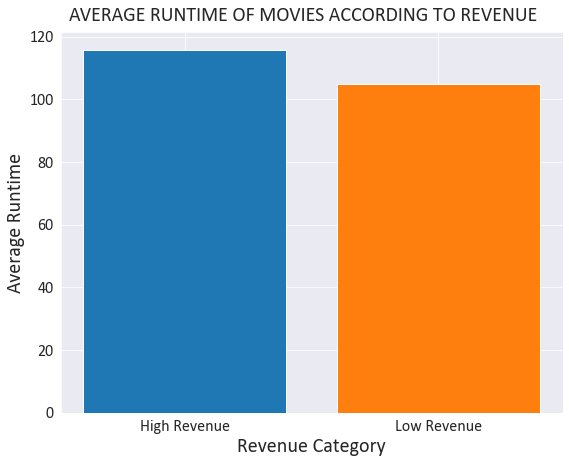

In [22]:
# plot of average runtime for each category of revenue
plt.figure(figsize=(9, 7))
plt.bar(['High Revenue'], high_rev_time)
plt.bar(['Low Revenue'], low_rev_time)
plt.suptitle('AVERAGE RUNTIME OF MOVIES ACCORDING TO REVENUE', y=.93, fontsize=20, fontfamily='Calibri')
plt.xlabel('Revenue Category', fontsize=20, fontfamily='Calibri')
plt.ylabel('Average Runtime', fontsize=20, fontfamily='Calibri');

>Movies with high revenues are average longer than those with low revenues. In fact, the difference is made of just a few minutes. 

<a id='ratings'></a>
### Voting average

>Finally, I am taking into account the average ratings given to each category. 

In [23]:
# amount of votes for movies from different revenue categories
high_amt_votes = high_revenue.vote_count.sum()
low_amt_votes = low_revenue.vote_count.sum()

high_amt_votes, low_amt_votes

(1429098, 686045)

In [24]:
# ratings of movies from different revenue categories 
high_rev_vote = high_revenue.vote_average.mean()
low_rev_vote = low_revenue.vote_average.mean()

>As shown above, high-revenue movies received more than the double of votes than those of low revenue, even though they comprise less than half of movie samples. As a result, I decided not to consider the proportion of votes in each movie to the total amount of votes present in the column `'prop_vote'`. That would make the rating of high revenue be well above low revenue. In other words, I have taken as a parameter the rating given by the `'vote_average'` column.

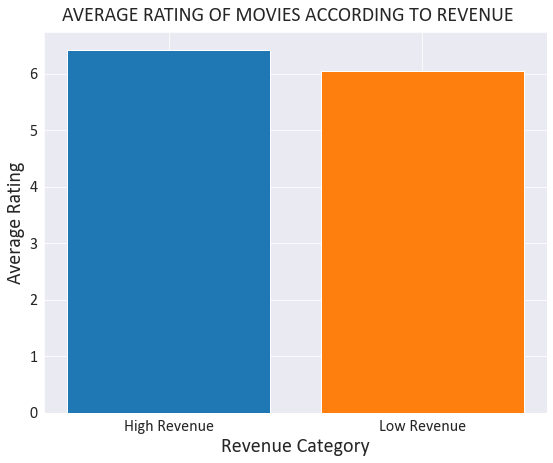

In [25]:
# plot of average runtime for each category of revenue
plt.figure(figsize=(9, 7))
plt.bar(['High Revenue'], high_rev_vote)
plt.bar(['Low Revenue'], low_rev_vote)
plt.suptitle('AVERAGE RATING OF MOVIES ACCORDING TO REVENUE', y=.93, fontsize=20, fontfamily='Calibri')
plt.xlabel('Revenue Category', fontsize=20, fontfamily='Calibri')
plt.ylabel('Average Rating', fontsize=20, fontfamily='Calibri');

>Movies with high revenues receive on average higher ratings when compared with those of low revenues. 

### 2. Which genres present higher ratings?

In [26]:
# Total amount of movies split by genre
total_genres = df_genres_sep.genres.count()

# Amount of movies for each genre
genre_amt = df_genres_sep.groupby('genres')['genres'].count()

# Proportion of each genre in the total
genre_prop = genre_amt/total_genres

<a id='amountgenres'></a>
>In order to avoid that genres with a few movies have their ratings displayed with significance, I computed the proportion of each genre to the total amount of genres resulted from the split operation. 

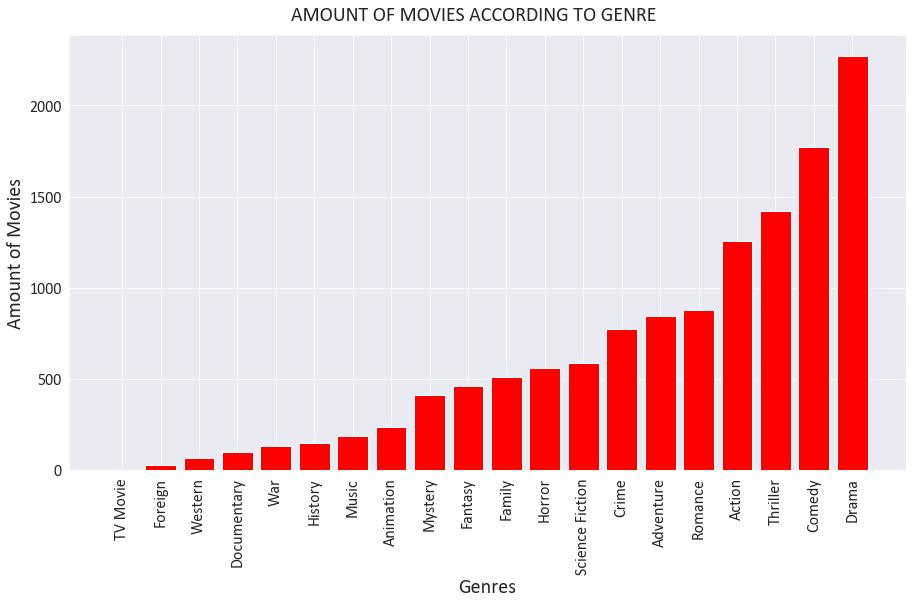

In [27]:
# sort movies by genre
genre_amt.sort_values(inplace=True)

# plot of the total amount of movies per genre
plt.figure(figsize=(15, 8))
plt.bar(genre_amt.index, genre_amt, color='red')
plt.suptitle('AMOUNT OF MOVIES ACCORDING TO GENRE', y=.93, fontsize=20, fontfamily='Calibri')
plt.xticks(rotation=90)
plt.xlabel('Genres', fontsize=20, fontfamily='Calibri')
plt.ylabel('Amount of Movies', fontsize=20, fontfamily='Calibri');

>According to the bar chart above, there is a great disparity among the genres in terms of samples quantity present in the dataset.  **TV Movie** does not even appear due to the amount of movies classified as it. Others barely reach one hundred entries.  

In [28]:
# Average rating for each genre
genre_rate = df_genres_sep.groupby('genres')['prop_vote'].mean()*1000

# Proportional rating for each genre
genre_prop_rate = genre_prop*genre_rate*10

>With the variable `genre_rate`, I grouped the average rating of each genre. I based on the column <a href="#propvote">`'prop_vote'`</a> which is composed by the proportional rating of each movie within the total amount of votes.
>
>For the second variable `genre_prop_rate`, I also considered the ratings according to the proportion of each genre in the total. In other words, movies with a few samples will have their significance diminished when comparing the ratings among genres. 
>
>The multiplication by 1000 and 10 in the variables above has the purpose of decreasing the decimal places and making it easier to visualize the values.   
>
>Below, you may find two charts. The first one takes into account the `genre_rate` and the other the `genre_prop_rate`. 

<a id='nopropgenres'></a>

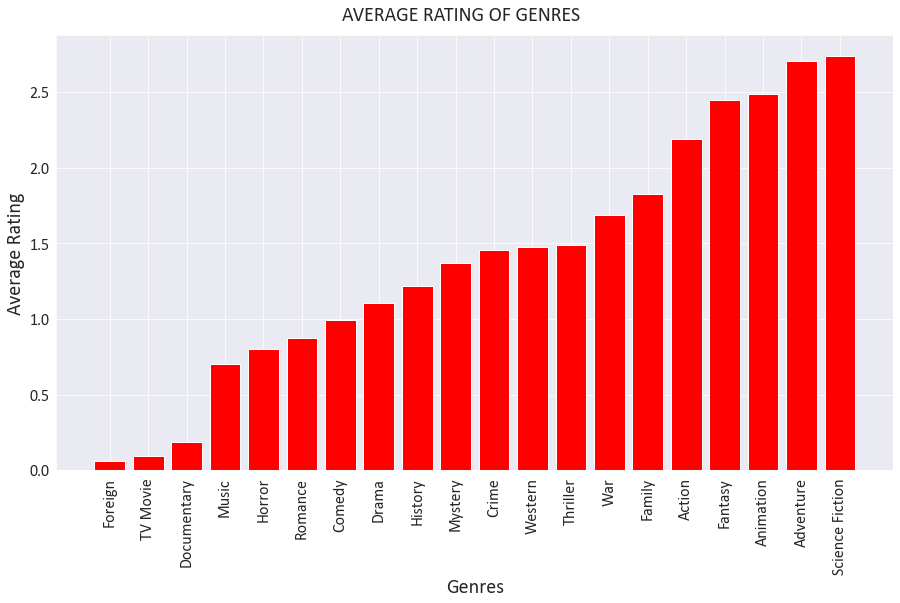

In [29]:
# sort values of ratings
genre_rate.sort_values(inplace=True)

# plot of genres by proportional rating
plt.figure(figsize=(15, 8))
plt.bar(genre_rate.index, genre_rate, color='red')
plt.suptitle('AVERAGE RATING OF GENRES', y=.93, fontsize=20, fontfamily='Calibri')
plt.xlabel('Genres', fontsize=20, fontfamily='Calibri')
plt.xticks(rotation=90)
plt.ylabel('Average Rating', fontsize=20, fontfamily='Calibri');

>This is the graphic without considering the proportion of each genre by the total amount of samples. In this situation, the **Science Fiction** genre scored highest, even though it comprises less than 600 movies. The **Animation** genre has even less samples and scored the third place. Indeed, three genres in the top 5 have less than 600 movies registered.

<a id='propgenres'></a>

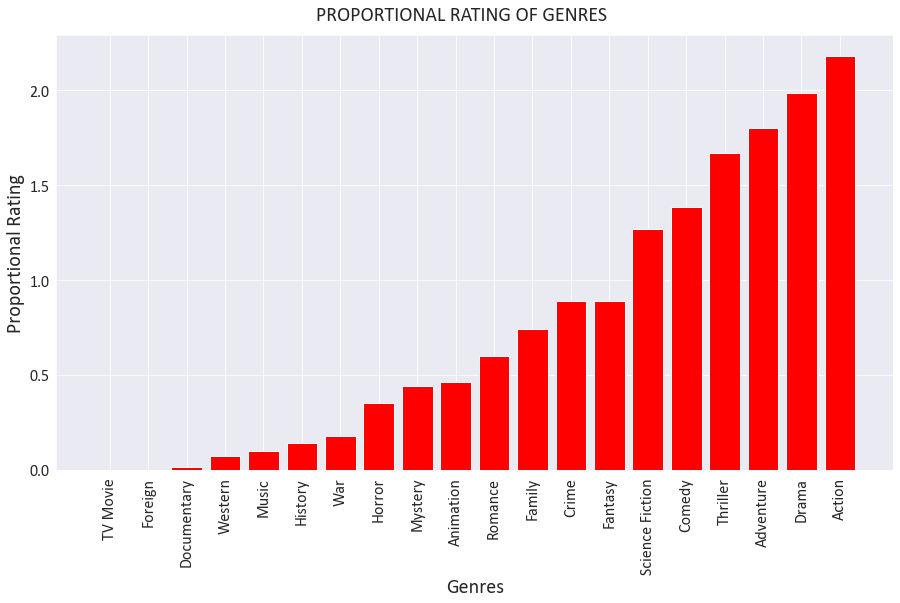

In [30]:
# sort values of proportional ratings
genre_prop_rate.sort_values(inplace=True)

# plot of genres by proportional rating
plt.figure(figsize=(15, 8))
plt.bar(genre_prop_rate.index, genre_prop_rate, color='red')
plt.suptitle('PROPORTIONAL RATING OF GENRES', y=.93, fontsize=20, fontfamily='Calibri')
plt.xlabel('Genres', fontsize=20, fontfamily='Calibri')
plt.xticks(rotation=90)
plt.ylabel('Proportional Rating', fontsize=20, fontfamily='Calibri');

>On the other hand, with the proportional rating of each genre we produce the chart above. It is noticeable that among the five genres that scored highest, just **Adventure** has less than 1000 movies. Meanwhile, genres with few entries have their importance reduced by that proportion. Two of them do not even appear in the chart due to their small score.   

<a id='conclusions'></a>
## Conclusions


### First Question

>In relation to the first question, these are the main findings:
>
> * <a href="#amount">More than half</a> of the movie samples are considered low revenue.
> * From the late 1980s, the <a href="#prop_high">proportion of high-revenue movies</a> varies between 20 and 30% of the released movies.
> * In terms of <a href="#runtime">runtime</a>, movies with high revenues are longer than those with low revenues.
> * On average, high-revenue movies receive <a href="#ratings">ratings</a> higher than the low category ones. 

> There are some ways we could explore to reach a better understanding of the dataset, for instance: 
>
> * It would be interesting to divide the revenue into more categories. The boundaries' differences between each category would need to be great enough to surely state that a movie is considered high revenue or not. 
> * When checking the amount of high-revenue movies released each year by the total, it would be interesting to have data from recent years, in order to determine if this almost constant proportion starting in the late 1980's repeats along the time. 
 
> This analysis could have been more accurate, if it had not been by some limitations. 
> 
> * The fact that half of the data was dropped may represent a huge loss to the analysis, even though working with zeroed rows would not help very much.
> * The small amount of entries in the first two decades difficults the comparison of this period to the following years. 

### Second Question 

> After exploring the data to answer the second question, I came to the following findings:
>
>* Movies labelled as Action, Thriller, Comedy or Drama are the most frequent ones, each of them accounting for <a href="#amountgenres">more than 1000 samples</a>.
>* <a href="#nopropgenres">Without considering the proportion</a> of each genre to the total amount of samples, the five highest scores belong to the genres Action, Fantasy, Animation, Adventure and Science Fiction, in ascending order. 
>* <a href="#propgenres">When we use the proportion of each genre</a> to the total, the genres that score higher are Comedy, Thriller, Adventure, Drama and Action. 

> Certain aspects of my analysis could have been improved by:
>
> * eliminating the rows with the genre TV Movie as the amount of its samples is not significant. 
> * adding data from recent years. 
> * analysing the most popular combination of genres. 

> Some of the limitations I came along in this process are that:
>
> * analysing the genres separately may not be the best way to determine which of them better perform as the highest rated movies might be the result of a combination of more than one genre. This also affects the exploration of other attributes in relation to the genres.
> * splitting the genres produced changes in many attributes as the same movie might now be registered in more than 4 rows. In fact, after the split, the number of rows jumped to more than twelve thousand.  